# **MACHINE PROBLEM NO. 1:** Quantum Circuits

## **$¡Gm4 B0¥5 Members:**
- CANILAO, Jose Andreo
- CHUA, Judy
- HA, Eun Ji
- MISAGAL, Justin Paul
- TELOSA, Arwyn Gabrielle

For this Machine Problem, you are tasked to solve the coding challenges in groups. You are to submit your code as Jupyter notebooks for each problem. Explanation of the code, including mathematical representations, should be provided alongside properly commented code. Each group should send only the link to their GitHub repository. Each problem will be assessed considering three criteria:
- Correctness (2 pt): The results of the code are as expected.
- Validity (3 pt): The results of the code are appropriately explained with theory or mathematical proof
- Additional points (2 pts) are given for detailed, valid explanations and experiments.

---



## **Problem 1 (5 pts):**
Generate a GIF for one of the following state evolutions. Proof to be provided is the solved quantum state per state evolution (applying a gate to a previous state) and its respective quantum circuit:

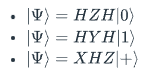




In [1]:
!pip -q install --upgrade "qiskit[visualization]" matplotlib imageio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 36.2 MB/s eta 0:00:00


In [2]:
import numpy as np, matplotlib.pyplot as plt, tempfile, shutil, imageio.v2 as imageio
from pathlib import Path
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
from IPython.display import HTML
from scipy.optimize import minimize
from IPython.display import Image, display

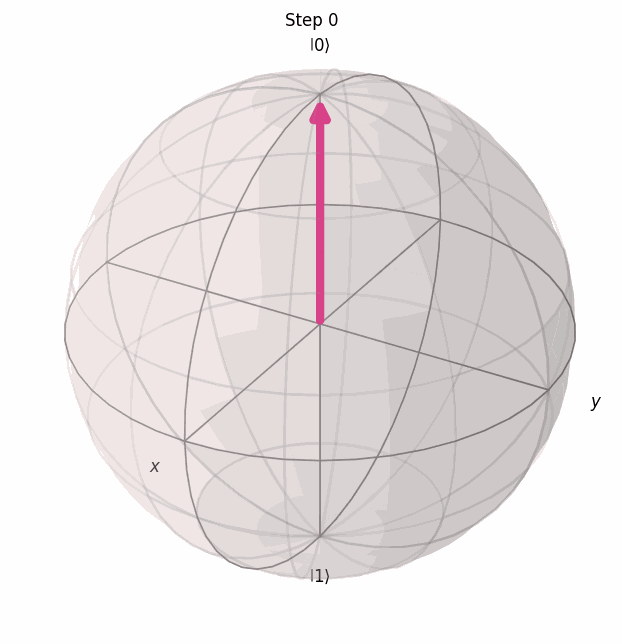

In [3]:
qc = QuantumCircuit(1, name="HZH|0>")
qc.h(0); qc.z(0); qc.h(0)

states = [Statevector.from_int(0, 2)]
for inst in qc.data:
    states.append(states[-1].evolve(inst.operation))

def bloch_coords(sv):
    ψ = np.asarray(sv.data, dtype=complex)
    ρ = np.outer(ψ, ψ.conj())
    return [2*ρ[0,1].real, -2*ρ[0,1].imag, (ρ[0,0]-ρ[1,1]).real]

tmp = Path(tempfile.mkdtemp())
frames = []
for i, sv in enumerate(states):
    fig = plot_bloch_vector(bloch_coords(sv), title=f"Step {i}")
    path = tmp / f"f{i}.png"
    fig.savefig(path, dpi=120, bbox_inches='tight'); plt.close(fig)
    frames.append(imageio.imread(path))

gif_path = Path('/content/HZH_state_evolution.gif')
hold      = 12
gif_fps   = 0.25

with imageio.get_writer(gif_path, mode='I', duration=gif_fps, loop=0) as w:
    for fr in frames:
        for _ in range(hold):
            w.append_data(fr)

shutil.rmtree(tmp)

display(Image(filename=gif_path, embed=True))

##**Validity Explanation – Problem 1**

| State | Column vector ( α, β )ᵀ | Bloch-sphere location |                  |                     |               |
| ----- | ----------------------- | --------------------- | ---------------- | ------------------- | ------------- |
| `     | 0>`                     | `[ 1  0 ]ᵀ`           | North pole  (+z) |                     |               |
| `     | +>`=`(                  | 0> +                  | 1>)/√2`          | `(1/√2) [ 1  1 ]ᵀ`  | Equator  (+x) |
| `     | ->`=`(                  | 0> –                  | 1>)/√2`          | `(1/√2) [ 1  -1 ]ᵀ` | Equator  (-x) |
| `     | 1>`                     | `[ 0  1 ]ᵀ`           | South pole  (-z) |                     |               |

---

| Frame | Gate just applied | Resulting state | Bloch-sphere position |                 |
| ----- | ----------------- | --------------- | --------------------- | --------------- |
| 0     | — start           | `               | 0>`                   | North pole (+z) |
| 1     | **H**             | `               | +>`                   | Equator (+x)    |
| 2     | **Z**             | `               | ->`                   | Equator (-x)    |
| 3     | **H**             | `               | 1>`                   | South pole (-z) |


Start: |ψ₀> = |0>

After H:
|ψ₁> = H|0> = |+> = (|0> + |1>)/√2

After Z:
|ψ₂> = Z|+> = |-> = (|0> – |1>)/√2

After H again:
|ψ₃> = H|-> = |1>

---

## **Problem 2:**
Generate the equivalent quantum circuits for the following logic gates. Provide a validation function to determine the validity of the truth table and the results of each gate you have coded:
- 3-qubit XNOR (5 pts)
- 3-qubit NAND (5 pts)
- 3-qubit OR (5 pts)
- 3-qubit NOR (5 pts)



---



In [4]:
from itertools import product
import pandas as pd
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# ============================================================
# Quantum Circuit Builders  (layout: [a, b, c, t, u])
# - a,b,c: input bits (prepared with X as needed)
# - t: target (|0⟩) where the gate result is computed
# - u: ancilla (|0⟩) used only when needed and uncomputed
# ============================================================

def xnor3_circuit():
    """XNOR3(a,b,c) = ¬(a ⊕ b ⊕ c). Parity into t, then invert."""
    qc = QuantumCircuit(5, name="XNOR3")
    a,b,c,t,u = 0,1,2,3,4
    qc.cx(a, t)
    qc.cx(b, t)
    qc.cx(c, t)
    qc.x(t)
    return qc

def nand3_circuit():
    """NAND3(a,b,c) = ¬(a ∧ b ∧ c). Use u=a∧b, then t^=u∧c; invert t; uncompute u."""
    qc = QuantumCircuit(5, name="NAND3")
    a,b,c,t,u = 0,1,2,3,4
    qc.ccx(a, b, u)   # u = a&b
    qc.ccx(u, c, t)   # t ^= u&c  => t = a&b&c
    qc.x(t)           # NAND
    qc.ccx(a, b, u)   # uncompute u
    return qc

def or3_circuit():
    """OR3(a,b,c) = ¬(¬a ∧ ¬b ∧ ¬c). De Morgan with ancilla; restore inputs."""
    qc = QuantumCircuit(5, name="OR3")
    a,b,c,t,u = 0,1,2,3,4
    qc.x(a); qc.x(b); qc.x(c)     # negate inputs
    qc.ccx(a, b, u)               # u = ¬a & ¬b
    qc.ccx(u, c, t)               # t ^= u & ¬c
    qc.x(t)                       # OR = NOT(¬a∧¬b∧¬c)
    qc.ccx(a, b, u)               # uncompute u
    qc.x(a); qc.x(b); qc.x(c)     # restore inputs
    return qc

def nor3_circuit():
    """NOR3(a,b,c) = (¬a ∧ ¬b ∧ ¬c). Same as OR but without final invert of t."""
    qc = QuantumCircuit(5, name="NOR3")
    a,b,c,t,u = 0,1,2,3,4
    qc.x(a); qc.x(b); qc.x(c)
    qc.ccx(a, b, u)
    qc.ccx(u, c, t)               # t ^= u & ¬c  => t = ¬a ∧ ¬b ∧ ¬c
    qc.ccx(a, b, u)               # uncompute u
    qc.x(a); qc.x(b); qc.x(c)
    return qc

# ============================================================
# Classical Truth Functions
# ============================================================

def truth_xnor3(a,b,c): return int((a ^ b ^ c) == 0)
def truth_nand3(a,b,c): return int(not (a and b and c))
def truth_or3(a,b,c):   return int(a or b or c)
def truth_nor3(a,b,c):  return int(not (a or b or c))

# ============================================================
# Simulation Helper (Statevector)
# Note: Qiskit bitstring order for 5 qubits is [q4 q3 q2 q1 q0] = [u t c b a]
# We read out t from index 1 of that bitstring.
# ============================================================

def simulate_output(circuit_func, a, b, c):
    # Prepare |a b c, t=0, u=0>
    prep = QuantumCircuit(5)
    if a: prep.x(0)
    if b: prep.x(1)
    if c: prep.x(2)
    full = prep.compose(circuit_func())
    sv = Statevector.from_instruction(full)
    probs = sv.probabilities_dict()
    bitstr = max(probs, key=probs.get)   # deterministic basis state
    t_bit = int(bitstr[1])               # [u t c b a]
    return t_bit

# ============================================================
# End-to-End Validation (all 8 inputs)
# ============================================================

circuits = {
    "XNOR3": (xnor3_circuit, truth_xnor3),
    "NAND3": (nand3_circuit, truth_nand3),
    "OR3":   (or3_circuit,   truth_or3),
    "NOR3":  (nor3_circuit,  truth_nor3),
}

rows = []
for a,b,c in product([0,1],[0,1],[0,1]):
    row = {"a":a, "b":b, "c":c}
    for name, (qc_func, truth_func) in circuits.items():
        out_t = simulate_output(qc_func, a,b,c)
        truth = truth_func(a,b,c)
        row[f"{name}_circuit"] = out_t
        row[f"{name}_truth"]   = truth
        row[f"{name}_OK"]      = (out_t == truth)
    rows.append(row)

df = pd.DataFrame(rows).sort_values(["a","b","c"]).reset_index(drop=True)
display(df)

summary = {name: bool(df[f"{name}_OK"].all()) for name in circuits.keys()}
print("Summary:", summary)

assert all(summary.values()), "Validation failed for at least one gate."

print("\nCircuit Diagrams:\n")
for name, (qc_func, _) in circuits.items():
    print(f"=== {name} ===")
    print(qc_func().draw("text"))
    print()

,a,b,c,XNOR3_circuit,XNOR3_truth,XNOR3_OK,NAND3_circuit,NAND3_truth,NAND3_OK,OR3_circuit,OR3_truth,OR3_OK,NOR3_circuit,NOR3_truth,NOR3_OK
0,0,0,0,1,1,True,1,1,True,0,0,True,1,1,True
1,0,0,1,0,0,True,1,1,True,1,1,True,0,0,True
2,0,1,0,0,0,True,1,1,True,1,1,True,0,0,True
3,0,1,1,1,1,True,1,1,True,1,1,True,0,0,True
4,1,0,0,0,0,True,1,1,True,1,1,True,0,0,True
5,1,0,1,1,1,True,1,1,True,1,1,True,0,0,True
6,1,1,0,1,1,True,1,1,True,1,1,True,0,0,True
7,1,1,1,0,0,True,0,0,True,1,1,True,0,0,True


Summary: {'XNOR3': True, 'NAND3': True, 'OR3': True, 'NOR3': True}

Circuit Diagrams:

=== XNOR3 ===
                         
q_0: ──■─────────────────
       │                 
q_1: ──┼────■────────────
       │    │            
q_2: ──┼────┼────■───────
     ┌─┴─┐┌─┴─┐┌─┴─┐┌───┐
q_3: ┤ X ├┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘└───┘
q_4: ────────────────────
                         

=== NAND3 ===
                         
q_0: ──■──────────────■──
       │              │  
q_1: ──■──────────────■──
       │              │  
q_2: ──┼────■─────────┼──
       │  ┌─┴─┐┌───┐  │  
q_3: ──┼──┤ X ├┤ X ├──┼──
     ┌─┴─┐└─┬─┘└───┘┌─┴─┐
q_4: ┤ X ├──■───────┤ X ├
     └───┘          └───┘

=== OR3 ===
     ┌───┐                    ┌───┐
q_0: ┤ X ├──■──────────────■──┤ X ├
     ├───┤  │              │  ├───┤
q_1: ┤ X ├──■──────────────■──┤ X ├
     ├───┤  │       ┌───┐  │  └───┘
q_2: ┤ X ├──┼────■──┤ X ├──┼───────
     └───┘  │  ┌─┴─┐├───┤  │       
q_3: ───────┼──┤ X ├┤ X ├──┼───────
          ┌

##**Validity Explanation – Problem 2**
---
**Reversible Design & Clean Ancilla**

Quantum circuits must be reversible. Each gate is implemented as a reversible network that computes the Boolean result into a target qubit t, initially set to |0⟩.

When a temporary ancilla u is used, it is uncomputed (returned to |0⟩), leaving no garbage.

---
**XNOR₃ (even parity)**

XNOR₃(a,b,c) = ¬(a ⊕ b ⊕ c)

CNOTs accumulate parity: t ⊕= a; t ⊕= b; t ⊕= c. A final NOT inverts parity to produce XNOR (1 for an even number of 1’s).

---
**NAND₃ (negated triple AND)**

NAND₃(a,b,c) = ¬(a ∧ b ∧ c)

Use Toffoli to compute u = a ∧ b, then another Toffoli to set t ⊕= u ∧ c → t = a ∧ b ∧ c. Invert t for NAND and repeat the first Toffoli to uncompute u.

---
**OR₃ (via De Morgan)**

a ∨ b ∨ c = ¬(¬a ∧ ¬b ∧ ¬c)

Temporarily negate the inputs, compute the AND of the negated inputs using Toffoli + ancilla, invert the result into OR, then restore the ancilla and inputs.

---
**NOR₃ (negated OR)**

NOR₃(a,b,c) = ¬(a ∨ b ∨ c) = (¬a ∧ ¬b ∧ ¬c)

Same structure as OR but without the final inversion on t, directly outputting the AND of the negated inputs.

---
**Validation**

All 8 input combinations (2³) were simulated using Statevector.
The measured t values match the classical truth functions for each gate.
The table and summary both show all True, confirming correctness and theoretical validity covering even-parity XNOR, Toffoli-chained AND for NAND, De Morgan logic for OR/NOR, and proper ancilla uncomputation.

## **Problem 3 (5 pts x 3):*
Create an optimization algorithm for solving the value of theta for the following equations (choose only one):

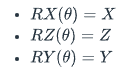

*Note that the score is multiplied by 3 due to difficulty. Choose only one of the three equations.*



---



For the equation RZ(θ) = Z, the following will be considered:

- Standard single-qubit gates:
  $$
  Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
  $$


- Rotation Gate Equation around the Z axis [(RZGate)](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.library.RZGate)
  $$
  RZ(θ) = e^{-i\frac{θ}{2}Z}
  $$

    - where Z can be any of the Pauli Matrices (X, Y, Z) and is substituted to get the following diagonal matrix exponential representation:
  
  $$
  RZ(θ) = \begin{pmatrix} e^{-i\frac{θ}{2}} & 0 \\ 0 & e^{i\frac{θ}{2}} \end{pmatrix}
  $$
\
\
However, by replacing π with Θ, the following can be computed,
  $$
  RZ(π) = \begin{pmatrix} e^{-i\frac{π}{2}} & 0 \\ 0 & e^{i\frac{π}{2}} \end{pmatrix}
  $$
- From here, the $e^{-i\frac{π}{2}}$ can be computed below based on [Euler's formula](https://www.mathsisfun.com/algebra/eulers-formula.html):
  $$
  e^{-i\frac{π}{2}} = cos(-\frac{π}{2})+isin(-\frac{π}{2})
  $$
  - where $cos(-\frac{π}{2}) = 0$ and $sin(-\frac{π}{2}) = -1$ so $e^{-i\frac{π}{2}} = -i$
- Substituting the values, the following can be obtained:
  $$
  RZ(π) = \begin{pmatrix} -i & 0 \\ 0 & i \end{pmatrix} = -i\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
  $$
  
Substituting θ with π produces a matriz that is equal to the Z gate up to a global phase ($-i$), concluding the following: $RZ(π) = -iZ$

Since it is up to a global phase, it can be ignored. Thus, an optimization algorithm can be solved.

To find a value of θ where $RZ(θ) = Z$, a cost function will be defined that is zero when two operators are equal up to phase and positive otherwise. As such, $U†U = I$ will be used since it is useful in allowing to compare [unitary matrices](https://learnquantum.io/chapters/02_quantum_computing/02_03_single_qb_sys.html) and determine whether they are equivvalent.

To measure the similarity between Z Gate and $RZ(θ)$, their trace overlap will be computed using the following equation. The trace is the sum of a matrix's diagonal elements and it is commonly used to assess how similar two operators are:
  $$
  S(θ) = Tr(Z†RZ(θ))
  $$
  where $S(θ)$ refers to their Similarity Score and $Tr(x)$ refers to Trace Overlap

Eseentially, $Z†=Z$, so:
  $$
  Z†RZ(θ) = \begin{pmatrix} 1*e^{-i\frac{θ}{2}} & 0 \\ 0 & -1*e^{i\frac{θ}{2}} \end{pmatrix} = \begin{pmatrix} e^{-i\frac{θ}{2}} & 0 \\ 0 & -e^{i\frac{θ}{2}} \end{pmatrix}
  $$

Since it is a trace overlap, take their trace:
  $$
  Tr(Z†RZ(θ)) = e^{-i\frac{θ}{2}} + (-e^{i\frac{θ}{2}})
  $$

This can be simplified as $e^{-ix}-e^{ix}=-2isin(x)$ based on Euler's formula so $S(θ) = -2isin(\frac{θ}{2})$ can be concluded.

The factor of $-i$ will not affect the value of $S(θ)$ since the magnitude removes the sign and phase. $S(θ)$ is maximized when $sin(\frac{θ}{2}) = 1$, giving a maximum value of $2$.
- Magnitude only depends on the absolute value and helps determine how close the operators are especially for complex numbers, which is in this case.

Finally, to find the cost of theta for solving the equation, it is important to normalize the similarity score to have an easier read on the data and for optimization purposes. As such, the equation below will be as follows:
  $$
  Cost(θ) = 1 - \frac{|S(θ)|}{2} = 1 - |sin(\frac{θ}{2})|
  $$
  - S(θ) is divided by 2 to normalize it and is equivalent to $sin(\frac{θ}{2})$
  - The Cost(θ) is limited to values from 0 to 1 since it is normalized
  - This means that a cost of 0 corresponds to a perfect result up to a global pahse while a cost of 1 corresponds to the maximum possible difference from Z

With that the following code will be implemented below:


Best Theta: 3.141592653589793  with a cost of  0.0
Optimized Theta: 3.141592653589793  with a cost of  0.0


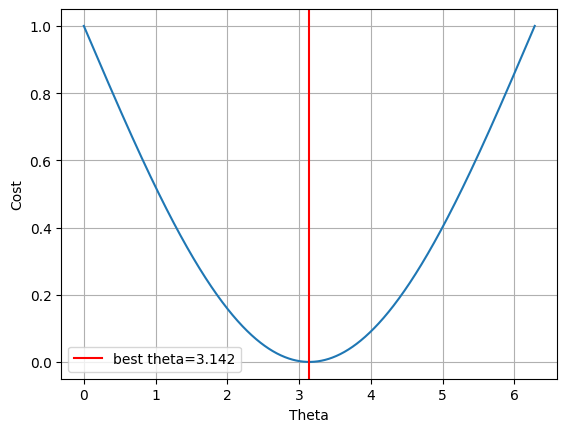

In [5]:
!pip install qiskit

import numpy as np
from numpy.linalg import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plot

import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
import numpy as np

# Z Gate
z_qc = QuantumCircuit(1)
z_qc.z(0)
Z = Operator(z_qc).data

def S(theta):
  # RZ Gate
  rz_qc = QuantumCircuit(1)
  rz_qc.rz(theta, 0)
  rz = Operator(rz_qc).data
  return np.trace(Z @ rz) # @ is for multiplying matrices

def cost(theta):
  t = np.atleast_1d(theta)[0] # to make it scalar
  return 1.0 - abs(S(t))/2.0 # normalized

# Get all values from 0 to 2pi
thetas = np.linspace(0, 2*np.pi, 1001)
costs = [cost(t) for t in thetas]
min_index = int(np.argmin(costs)) # get the index of the smallest value in the array
min_theta = thetas[min_index]

result = minimize(cost, x0=min_theta, method='BFGS') # most commonly used method in finding a minimum efficiently
optimized = float(result.x[0] % (2*np.pi)) # make the value within 0 and 2pi

print("Best Theta:", min_theta, " with a cost of ", costs[min_index])
print("Optimized Theta:", optimized, " with a cost of ", result.fun)

# For visualization purposes
plot.plot(thetas, costs)
plot.axvline(optimized, color='r', label=f'best theta={optimized:.3f}')
plot.xlabel("Theta")
plot.ylabel("Cost")
plot.legend()
plot.grid(True)
plot.show()

## **Problem 4 (5 pts x 6):**
Create an optimization algorithm for solving the value of theta, phi, and lambda for the following equation:

image.png

Note that:

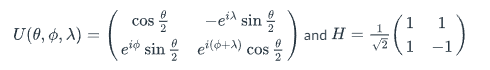



---



1. Defining the Target Matrix H:

      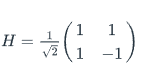

This is the target matrix we want to match using the parameterized unitary 𝑈 ( 𝜃 , 𝜙 , 𝜆 )

In [6]:
import numpy as np
from scipy.optimize import minimize

#1 Define Matrix H
H = (1 / np.sqrt(2)) * np.array([ [1,  1],
                                  [1, -1] ], dtype=complex)

2. Defining the Parameterized Quantum Gate

    This implements the given matrix:
    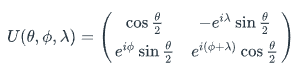

    


In [7]:
#2 Define U matrix
def U_matrix(theta, phi, lambd):
  cos = np.cos(theta/2)
  sin = np.sin(theta/2)

  u11 = cos
  u12 = -np.exp(1j * lambd) * sin
  u21 = np.exp(1j * phi) * sin
  u22 = np.exp(1j * (phi + lambd)) * cos

  return np.array([[u11, u12], [u21, u22]], dtype=complex)

3. Defining the Cost Function

   The goal of the optimization is to make: U(θ,ϕ,λ) ≈ H

   To measure how close they are, we calculate the Frobenius norm: C(θ,ϕ,λ)=∥U−H∥2F​  = i,j∑​∣Uij​−Hij​∣^2

   This sum is implemented in NumPy as: np.sum(np.conjugate(M) * M)

   so the optimizer tries to minimize:C=∥U−H∥F2​. A final cost near 0 means the matrices match.

In [8]:
#3optimization cost function
def cost_function(params):
  theta, phi, lambd = params
  U = U_matrix(theta, phi, lambd)
  M = U - H
  return np.real(np.sum(np.conjugate(M) * M))

4. Initial Guess and Bounds

We restrict the parameters to physically meaningful ranges:

  - 𝜃∈[0,𝜋]
  - 𝜙∈[0,2𝜋]
  - λ∈[0,2π]

In [9]:
# 4 initial guess and parameter bounds
initial_guess = [1.0, 1.0, 1.0]  # θ, φ, λ initial guess

bounds = [
    (0, np.pi),        # θ ∈ [0, π]
    (0, 2*np.pi),      # φ ∈ [0, 2π]
    (0, 2*np.pi)       # λ ∈ [0, 2π]
]

5. Running the Optimizer

We use the L-BFGS-B algorithm, a gradient-based optimization method that supports bounds.

In [10]:
#5 optimizer
result = minimize(cost_function, initial_guess, method="L-BFGS-B", bounds=bounds)

theta_opt, phi_opt, lambda_opt = result.x

6. Displaying Results

In [11]:
#6 displaying of results
print("Optimal parameters found:")
print(f"theta  = {theta_opt}")
print(f"phi    = {phi_opt}")
print(f"lambda = {lambda_opt}")

print("\nFinal cost =", result.fun)
print("\nU(theta,phi,lambda) =\n", U_matrix(theta_opt, phi_opt, lambda_opt))

Optimal parameters found:
theta  = 1.5707956446586502
phi    = 0.0
lambda = 3.1415925486478082

Final cost = 2.4366774964704634e-13

U(theta,phi,lambda) =
 [[ 0.70710702+0.00000000e+00j  0.70710654-7.42051639e-08j]
 [ 0.70710654+0.00000000e+00j -0.70710702+7.42052145e-08j]]
